#Neural Network Classification Model for Handwritten Digit Recognition 
I am using this data to work an example of neural network classification. 

In [7]:
# load modules
import numpy as np 
import pandas as pd 
np.random.seed(1)
# get data
test  = pd.read_csv('/Users/willsu/Downloads/data/test.csv')
train = pd.read_csv('/Users/willsu/Downloads/data/train.csv')

## Exploratory Analysis
Summary statistics and visualizations of data. The data is first preprocessed by visualizing the sample size for each digit in the dataset, plotting a few of the digits using the data provided to get an understanding of exactly what the data represents, normalizing the data, and reducing the features using PCA. It is important to note that this dataset is sparse, meaning that there are mostly 0's in the feature matrix. Some pixels carry a lot of information about the digit written, while other pixel features such as the edges and usually 0 and not very informative. The scale of the data used to represent the pixels is not numerically meaningful, which leads to the need to normalize the data so that the values do not contribute to the model in an improper way. 

In [8]:
print(train.shape)
print(test.shape)
train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This simple histogram shows the count of digits in the training data for each number. This graphic is used to visualize if there is an unequal sample size among the digits. The sample size for each digit appear to be comparable. There is no issue of unequal sampling. 

Text(0, 0.5, 'Frequency')

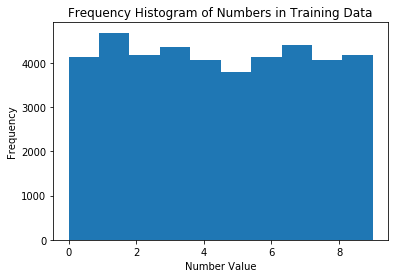

In [10]:
import matplotlib.pyplot as plt
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

This graphic plots the first few digits in the training set to show how this pixel data is representing digits, and to also show how the handwriting varies. Not all digits are written the same. For example, there is a lot of variation in how people write 4s and 9s. 

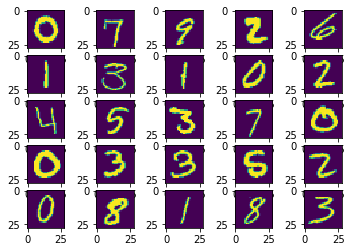

In [11]:
import math
# plot the first 25 digits in the training set. 
f, ax = plt.subplots(5, 5)
# plot some 4s as an example
for i in range(1,26):
    # Create a 1024x1024x3 array of 8 bit unsigned integers
    data = train.iloc[i,1:785].values #this is the first number
    nrows, ncols = 28, 28
    grid = data.reshape((nrows, ncols))
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(grid)

# PCA
There are many features in this data resulting in high dimensionality. PCA is used to compress the features into a small but informative set of features before using the data in a machine learning model. Data is normalized before PCA is applied. This is so the scale of the data does not throw of the PCA, and so the 0's are represented meaningfully.  There is unequal variance in this data, and features with larger variance will influence the PCA more, creating bias. This is why the data is normalized. 

In [12]:
## normalize data ##
label_train=train['label']
train=train.drop('label', axis=1)

#normalize data
train = train / 255
test = test / 255
train['label'] = label_train

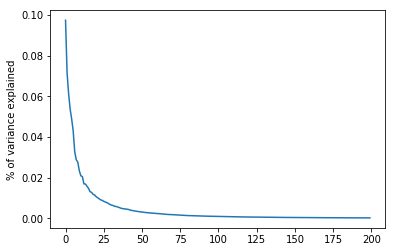

In [13]:
from sklearn import decomposition
from sklearn import datasets

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
#plot reaches asymptote at around 50, which is optimal number of PCs to use. 

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']

#decompose test data
#pca.fit(test)
PCtest = pd.DataFrame(pca.transform(test))

This plot shows the separation of classes (digits) based on the first PCAs. Theoretically, these PCs should explain most of the variance in the data, enough to show separation in the groups of digits.

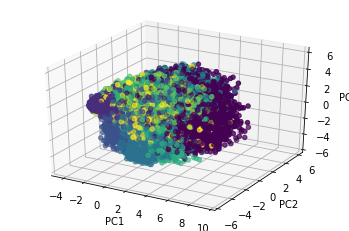

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

x =PCtrain[0]
y =PCtrain[1]
z =PCtrain[2]

colors = [int(i % 9) for i in PCtrain['label']]
ax.scatter(x, y, z, c=colors, marker='o', label=colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

#Neural Network

In [16]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:20000]
X=PCtrain.drop('label', axis=1)[0:20000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(PCtrain.drop('label', axis=1)[20001:42000])
expected = PCtrain['label'][20001:42000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2200
           1       0.99      0.99      0.99      2418
           2       0.97      0.97      0.97      2167
           3       0.96      0.95      0.96      2270
           4       0.97      0.98      0.98      2101
           5       0.97      0.97      0.97      2001
           6       0.98      0.98      0.98      2155
           7       0.97      0.98      0.97      2331
           8       0.9

In [19]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output.csv', index=False)